<a href="https://colab.research.google.com/github/Noam-Diamant/DL-Projects/blob/main/Architectures_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install neccessary libraries

# KWS Project

## Getting the data

### Install requirements and import libraries

In [ ]:
!pip install tensorflow
!pip install tensorflow_datasets
!pip install datasets
!pip install librosa
!pip install tensorflow_io
!pip install pydub
!pip install pydub
!pip install tensorflow_io
!pip install TensorBoard
!pip install -U tensorboard_plugin_profile
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from torchaudio.datasets import SPEECHCOMMANDS
from IPython.display import Audio
import tqdm.notebook as tqdm
import tensorflow as tf
import tensorflow_datasets as tfds
import librosa
import tensorflow_io as tfio
import pydub
from IPython.display import Audio
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

### Download the dataset

In [ ]:
version = 3
ds = tfds.load(f'speech_commands:0.0.{version}')
train = ds['train']
validation = ds['validation']
test = ds['test']

## Visualiaze the data

### General information about the dataset

In [ ]:
print(dataset_info)

NameError: name 'dataset_info' is not defined

### General information about each set

In [ ]:
sets = ['train', 'validation', 'test']
for set in sets:
  print('************************************************************')
  print(f'{set.upper()} set:')
  print('************************************************************')
  print(f'Structure of the {set} set: \n{ds[set]}')
  print('************************')
  print(f'Number of examples in {set} set: {len(ds[set])}')
  print('************************')
  for example in ds[set].take(1):
    print(f'A specific raw audio example in the {set} set:')
    print('************************')
    raw_audio = example['audio'].numpy()
    print(example)
    print('************************')
    print(f'Keys in {set} example: {example.keys()}')

************************************************************
TRAIN set:
************************************************************
Structure of the train set: 
<_PrefetchDataset element_spec={'audio': TensorSpec(shape=(None,), dtype=tf.int16, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
************************
Number of examples in train set: 85511
************************
A specific raw audio example in the train set:
************************
{'audio': <tf.Tensor: shape=(16000,), dtype=int16, numpy=array([-15, -18, -12, ...,  16,  21,  25], dtype=int16)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=4>}
************************
Keys in train example: dict_keys(['audio', 'label'])
************************************************************
VALIDATION set:
************************************************************
Structure of the validation set: 
<_PrefetchDataset element_spec={'audio': TensorSpec(shape=(None,), dtype=tf.int16, name=None), 'label': 

### KWS classes information

#### Example of some audio

In [ ]:
print('Showing a specific audio example:')
Audio(raw_audio, rate=16000)

Showing a specific audio example:


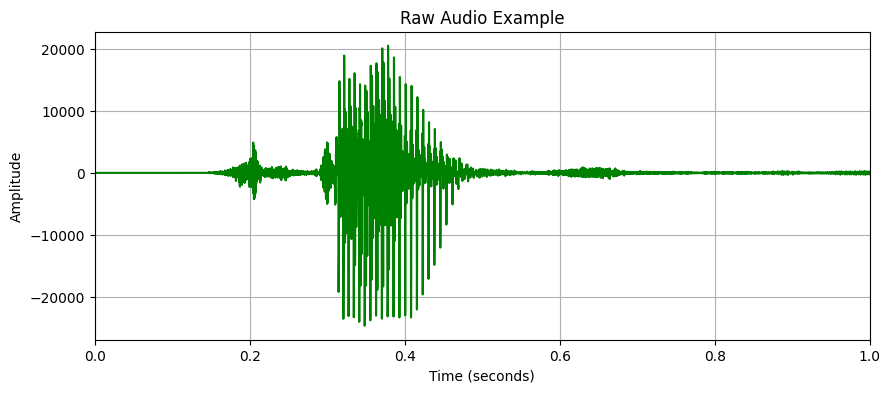

In [ ]:
# Assuming raw_audio is your audio data array
sample_rate = 16000  # Replace with your actual sample rate if different

# Create a time array from 0 to 1
time = np.linspace(0, 1, len(raw_audio))

plt.figure(figsize=(10, 4))
plt.plot(time, raw_audio, color='green')
plt.title("Raw Audio Example")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.grid(True)
plt.show()

#### All the classes

In [ ]:
# Get dataset info and class names
dataset_name = f'speech_commands:0.0.{version}'
dataset_info = tfds.builder(dataset_name).info
class_names = dataset_info.features['label'].names
print(f'Number of classes: {len(class_names)}')
print(f'Class names: {class_names}')

# Create a dictionary of class numbers and names
class_dict = {i: name for i, name in enumerate(class_names)}

# Print the dictionary
print('Classes with numeric labels:')
print(class_dict)

Number of classes: 12
Class names: ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']
Classes with numeric labels:
{0: 'down', 1: 'go', 2: 'left', 3: 'no', 4: 'off', 5: 'on', 6: 'right', 7: 'stop', 8: 'up', 9: 'yes', 10: '_silence_', 11: '_unknown_'}


Getting a list of the classes

In [ ]:
sets = ['train', 'validation', 'test']
class_samples = {}
for sample in train:
    audio = sample['audio']
    label = sample['label'].numpy()

    if label not in class_samples:
        class_samples[label] = audio
    if len(class_samples) == len(class_names):
        break

samples_list = [{'audio': audio, 'label': tf.constant(label)}
                    for label, audio in class_samples.items()]

# Sort samples by label
samples_list = sorted(samples_list, key=lambda x: x['label'].numpy().item())

#### Audio example of each class

In [ ]:
import IPython.display as ipd

def play_audio_samples(samples, class_names):
    """
    Display and play sorted audio samples for each class.

    Args:
    samples (list of dict): A list of dictionaries, each containing 'audio' and 'label' keys.
    class_names (list): A list of class names corresponding to the label indices.
    """

    for sample in samples:
        label_index = sample['label'].numpy().item()
        class_name = class_names[label_index]
        audio = sample['audio']

        print(f"Class {label_index}: {class_name}")
        display(ipd.Audio(audio, rate=16000))
        print("\n")  # Add a newline for better readability

# Use the function
play_audio_samples(samples_list, class_names)

Class 0: down




Class 1: go




Class 2: left




Class 3: no




Class 4: off




Class 5: on




Class 6: right




Class 7: stop




Class 8: up




Class 9: yes




Class 10: _silence_




Class 11: _unknown_


#### Graph of each class

In [ ]:
# Prepare audio samples with labels
samples_list = [{'audio': sample['audio'].numpy(), 'label': sample['label'].numpy()} for sample in samples_list]

# Create titles and extract audio signals
plot_titles = [f"Class {sample['label']}: {labels[sample['label']]}" for sample in samples_list]
audio_signals = [sample['audio'] for sample in samples_list]

# Set up the plot
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Plot the signals
for idx, (title, signal) in enumerate(zip(plot_titles, audio_signals)):
    row = idx // cols
    col = idx % cols

    # Calculate time array (assuming sample rate of 16000 Hz)
    time_axis = np.arange(len(signal)) / 16000

    axes[row, col].set_title(title)
    axes[row, col].plot(time_axis, signal)
    axes[row, col].set_xlabel('Time (s)')
    axes[row, col].set_ylabel('Amplitude')
    axes[row, col].grid(True)

# Remove any unused subplots
for idx in range(len(audio_signals), rows * cols):
    row = idx // cols
    col = idx % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

NameError: name 'labels' is not defined

#### The distribution of the classes in the different sets

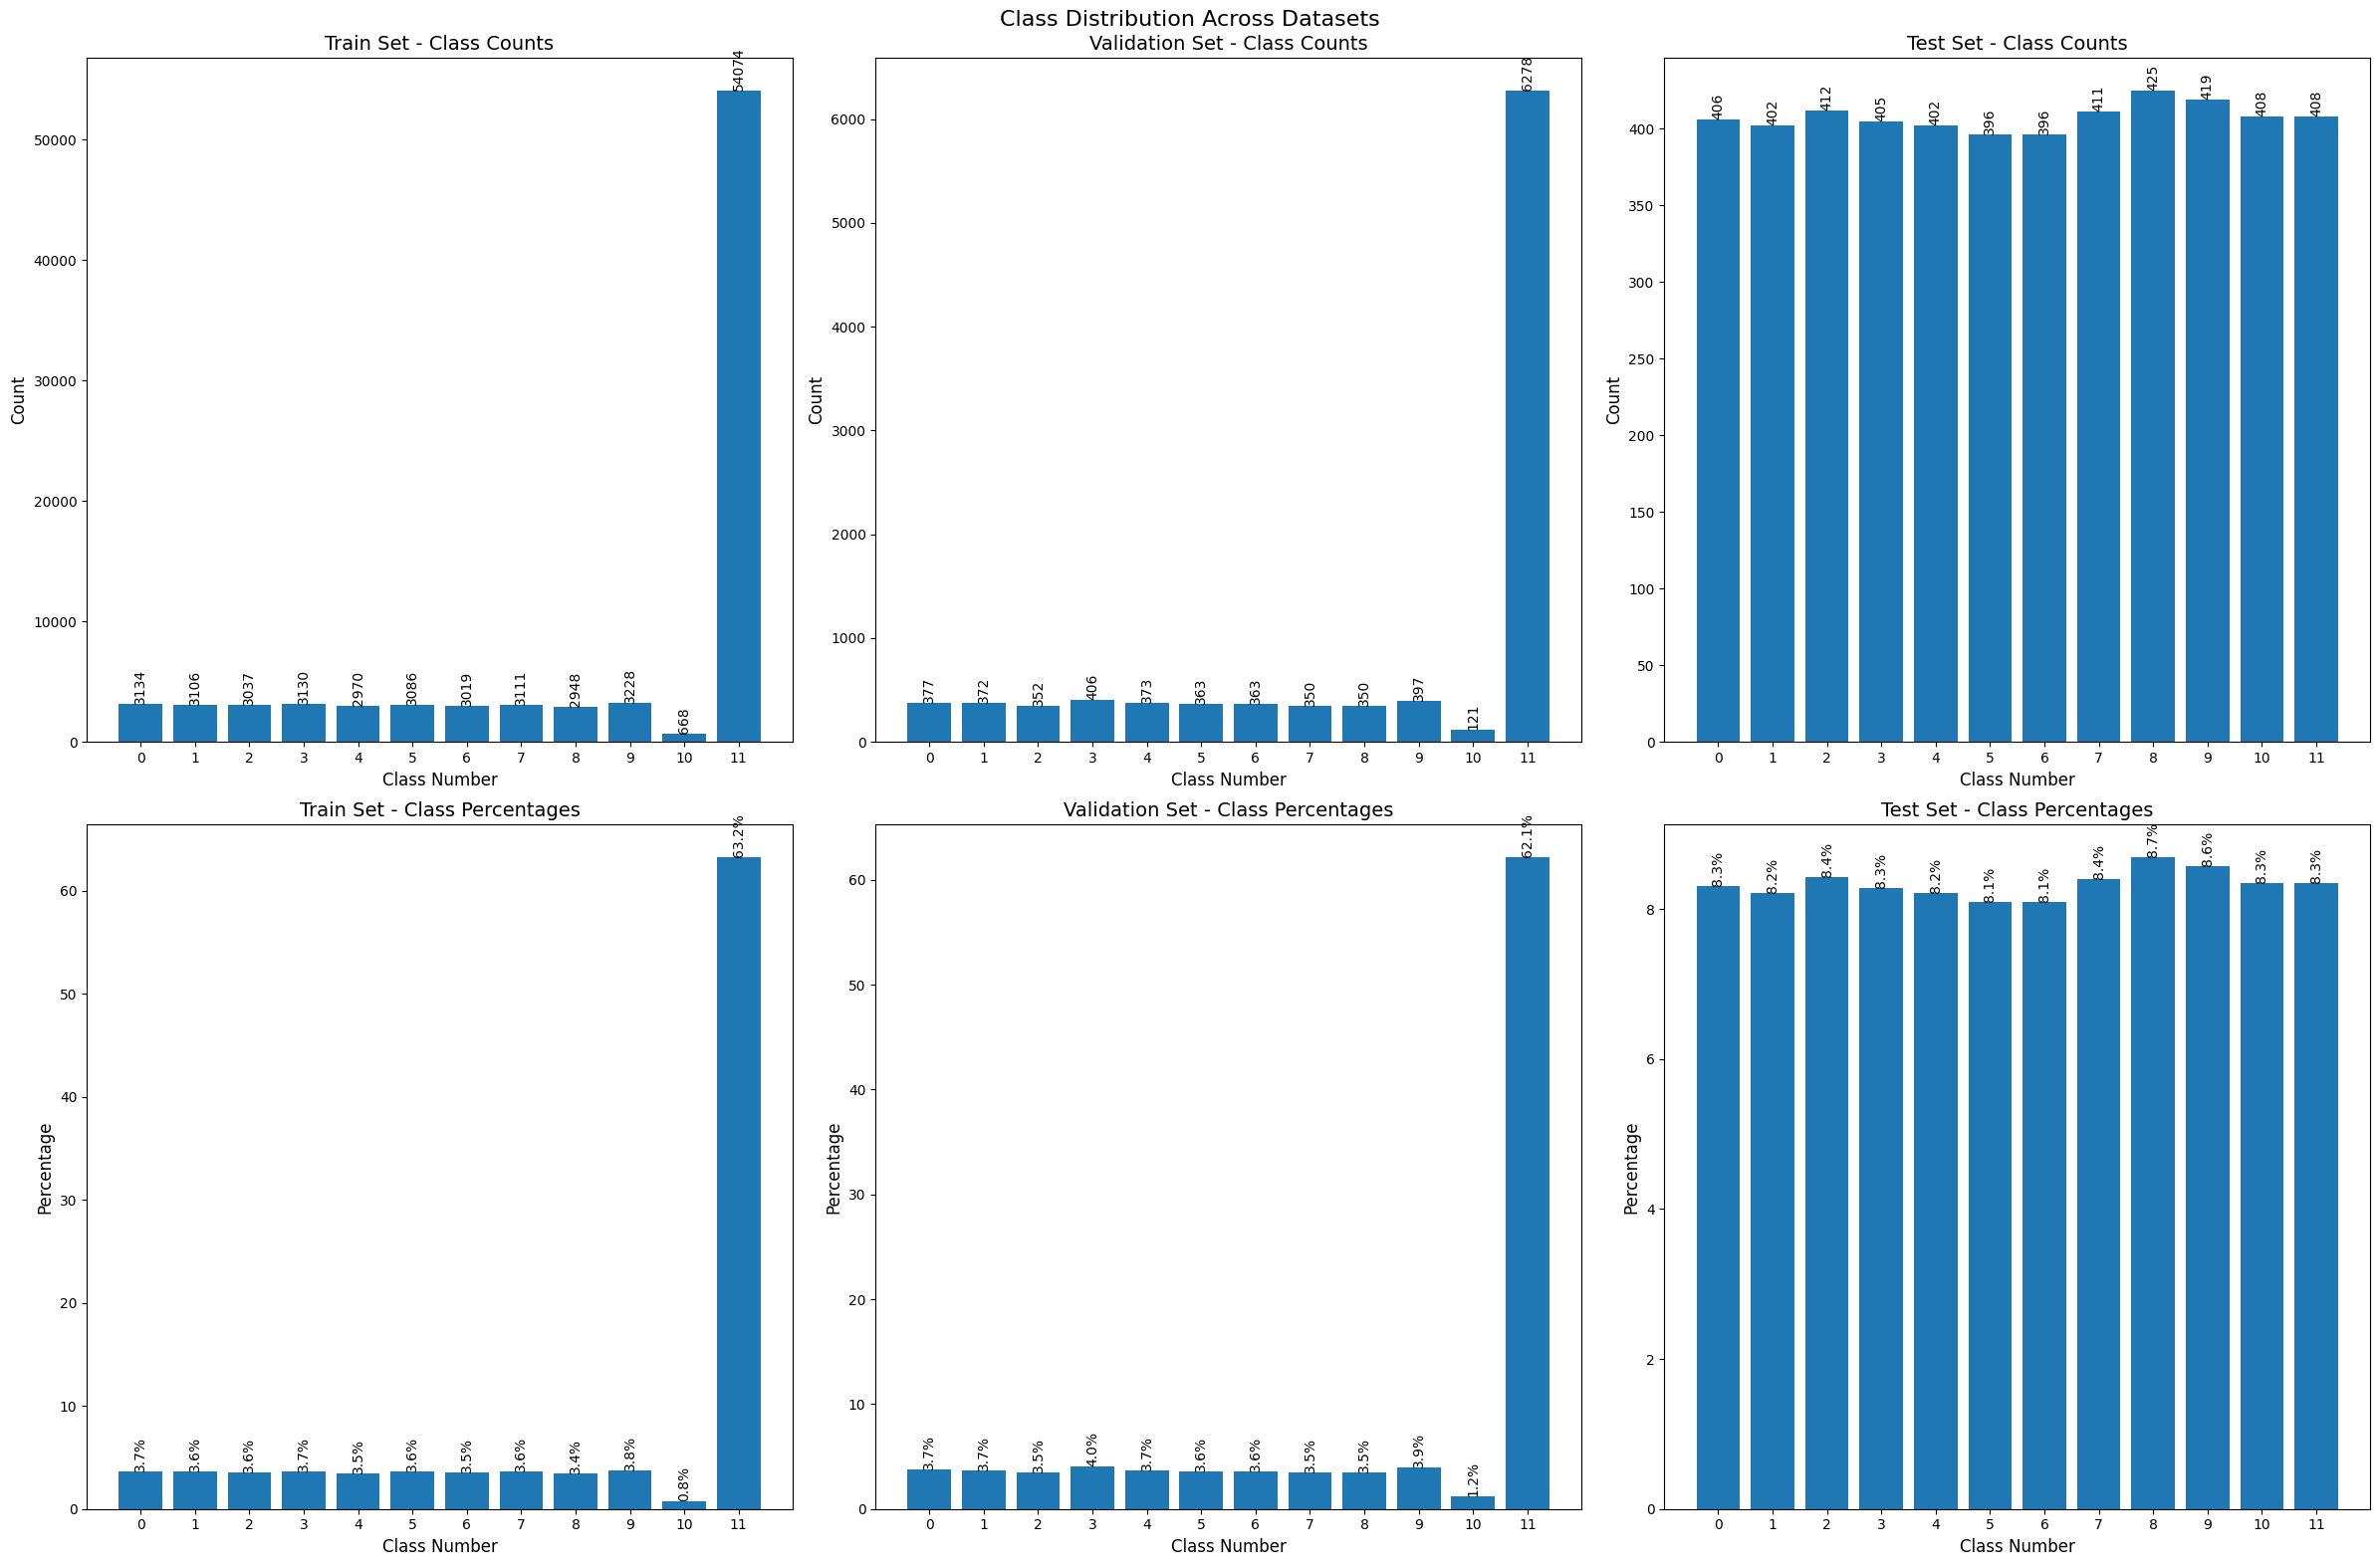

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define datasets and their names
datasets = [train, validation, test]
dataset_names = ['Train', 'Validation', 'Test']

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for idx, (data, name) in enumerate(zip(datasets, dataset_names)):
    # Extract labels from the dataset
    label_list = [element['label'].numpy() for element in data]

    # Count the occurrences of each label
    label_freq = Counter(label_list)

    # Get the labels and their counts
    class_nums = sorted(list(label_freq.keys()))
    instance_counts = [label_freq[num] for num in class_nums]

    # Calculate percentages
    total_instances = sum(instance_counts)
    percentages = [count / total_instances * 100 for count in instance_counts]

    # Plot counts
    bars_count = axes[0, idx].bar(class_nums, instance_counts)
    axes[0, idx].set_title(f'{name} Set - Class Counts', fontsize=14)
    axes[0, idx].set_xlabel('Class Number', fontsize=12)
    axes[0, idx].set_ylabel('Count', fontsize=12)
    axes[0, idx].set_xticks(class_nums)
    axes[0, idx].tick_params(axis='both', which='major', labelsize=10)

    # Add count labels on top of each bar in the first row
    for bar in bars_count:
        height = bar.get_height()
        axes[0, idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{int(height)}',
                          ha='center', va='bottom', rotation=90, fontsize=10)

    # Plot percentages
    bars_percent = axes[1, idx].bar(class_nums, percentages)
    axes[1, idx].set_title(f'{name} Set - Class Percentages', fontsize=14)
    axes[1, idx].set_xlabel('Class Number', fontsize=12)
    axes[1, idx].set_ylabel('Percentage', fontsize=12)
    axes[1, idx].set_xticks(class_nums)
    axes[1, idx].tick_params(axis='both', which='major', labelsize=10)

    # Add percentage labels on top of each bar in the second row
    for bar in bars_percent:
        height = bar.get_height()
        axes[1, idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{height:.1f}%',
                          ha='center', va='bottom', rotation=90, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add some space at the top
fig.suptitle('Class Distribution Across Datasets', fontsize=16)  # Add a main title
plt.show()

## Preprocess the data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

def extract_features(audio, sample_rate = 16000, max_pad_len=100):
  try:
      # # Load the audio file
      audio = audio / np.max(np.abs(audio))
      mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
      # Pad the MFCC array to ensure consistent shape
      pad_width = max_pad_len - mfccs.shape[1]
      mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
      return mfccs
  except Exception as e:
      print(f"Error encountered while parsing file: {audio}")
      return None

def get_preprocessed_data():
  mfccs = {}
  spec_set = {}
  specific_dataset_features = []
  specific_dataset_labels = []
  for data_set_type in ds:
    print("preprocessing " + data_set_type + "...")
    for audio_data in ds[data_set_type]:
      feature = extract_features(audio_data['audio'].numpy())
      if feature is not None:
          specific_dataset_features.append(feature)
          # Assuming you have a way to get the label from the file path or file name
          label = audio_data['label'].numpy().item()
          specific_dataset_labels.append(label)
    spec_set['audio'] = specific_dataset_features
    spec_set['labels'] = specific_dataset_labels
    mfccs[data_set_type] = spec_set
    specific_dataset_features = []
    specific_dataset_labels = []

  return mfccs

mfccs = get_preprocessed_data()
mfccs = np.expand_dims(mfccs, axis=-1)  # Add channel dimension

preprocessing train...


In [ ]:

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # # Third convolutional layer
    # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
# Parameters
n_mfcc=13
max_pad_len=100
num_channels = 1
input_shape = (n_mfcc, max_pad_len, num_channels)
num_classes = 12  # 10 words + "is_unknown" + "_silence_"

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(mfccs['train']['audio'], mfccs['train']['label'], epochs=3, batch_size=32, validation_data=(mfccs['test']['audio'], mfccs['test']['label']))

# Evaluate the model
test_loss, test_acc = model.evaluate(mfccs['test']['audio'], mfccs['test']['label'])
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('audio_classification_cnn.h5')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices